In [1]:
%matplotlib inline

import multiprocessing
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from itertools import islice

In [2]:
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.repository.datasets import get_dataset

from estimator import HopfieldAREstimator

2023-10-03 16:54:32.221902: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-03 16:54:32.221945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-03 16:54:32.221976: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dataset = get_dataset("electricity")

In [4]:
estimator = HopfieldAREstimator(
    freq=dataset.metadata.freq,
    prediction_length=dataset.metadata.prediction_length,
    context_length=dataset.metadata.prediction_length*7,
    beta=8.0,
    
    num_feat_static_cat=1,
    cardinality=[321],
    embedding_dimension=[3],
    dim_feedforward=32,
    num_layers=4,
    nhead=4,
    activation="gelu",

    batch_size=128,
    num_batches_per_epoch=100,
    trainer_kwargs=dict(max_epochs=50),
)

In [ ]:
predictor = estimator.train(
    training_data=dataset.train,
    shuffle_buffer_length=1024,
    cache_data=True,
)

/home/kashif/.env/pytorch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer was not TransformerEncoderLayer
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified

Authorization required, but no authorization protocol specified

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/kashif/.env/pytorch/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:71: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(
You are using a CUDA device ('NVIDIA GeForce RTX 3090 Ti') that has Tenso

> /mnt/scratch/kashif/pytorch-transformer-ts/hopfield_ar/module.py(442)forward()
    440         pdb.set_trace()
    441 
--> 442         params, loc, scale, _, static_feat = self.unroll_lagged_encoder(
    443             feat_static_cat,
    444             feat_static_real,



ipdb>  future_time_feat.shape


torch.Size([1, 24, 5])


ipdb>   future_time_feat[:, :1].shape


torch.Size([1, 1, 5])


ipdb>   future_time_feat[:, :1].shape[-2]


1


ipdb>  1 > 1


False


In [6]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=dataset.test,
    predictor=predictor
)

In [ ]:
forecasts = list(forecast_it)

> /mnt/scratch/kashif/pytorch-transformer-ts/hopfield_ar/module.py(495)forward()
    493             import pdb
    494             pdb.set_trace()
--> 495             repeated_past_target = torch.cat(
    496                 (repeated_past_target, scaled_next_sample), dim=1
    497             )



ipdb>  embedded_input.shape


torch.Size([12800, 1, 64])


In [ ]:
tss = list(ts_it)

In [5]:
# num_workers is limited to 10 if cpu has more cores
num_workers = min(multiprocessing.cpu_count(), 10)

evaluator = Evaluator(num_workers=num_workers)
agg_metrics, ts_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(dataset.test))

NameError: name 'tss' is not defined

In [33]:
agg_metrics

{'MSE': 1443718.4524628564,
 'abs_error': 7971865.709179898,
 'abs_target_sum': 128632956.0,
 'abs_target_mean': 2385.272140631954,
 'seasonal_error': 189.49338196116761,
 'MASE': 0.696544005867745,
 'MAPE': 0.09236299170963876,
 'sMAPE': 0.10361049243009571,
 'MSIS': 5.755679335834036,
 'QuantileLoss[0.1]': 3607842.781247515,
 'Coverage[0.1]': 0.06525367156208278,
 'QuantileLoss[0.2]': 5522221.853712769,
 'Coverage[0.2]': 0.1400014834594274,
 'QuantileLoss[0.3]': 6805877.159181467,
 'Coverage[0.3]': 0.22492953567719923,
 'QuantileLoss[0.4]': 7652783.962084616,
 'Coverage[0.4]': 0.31673713098946743,
 'QuantileLoss[0.5]': 7971865.694978495,
 'Coverage[0.5]': 0.41275404242693964,
 'QuantileLoss[0.6]': 7895446.734374644,
 'Coverage[0.6]': 0.5051364782673193,
 'QuantileLoss[0.7]': 7235066.862025042,
 'Coverage[0.7]': 0.6159323542501113,
 'QuantileLoss[0.8]': 5959034.037508083,
 'Coverage[0.8]': 0.7350726895119419,
 'QuantileLoss[0.9]': 3905705.52061999,
 'Coverage[0.9]': 0.8623164218958611

In [46]:
agg_metrics

{'MSE': 1020944.2496843787,
 'abs_error': 7725759.908168452,
 'abs_target_sum': 128632956.0,
 'abs_target_mean': 2385.272140631954,
 'seasonal_error': 189.49338196116761,
 'MASE': 0.6927482568462915,
 'MAPE': 0.08888009236121519,
 'sMAPE': 0.1011272518309915,
 'MSIS': 5.8921407240410675,
 'QuantileLoss[0.1]': 3460832.3598046713,
 'Coverage[0.1]': 0.05058596647381694,
 'QuantileLoss[0.2]': 5335275.928374879,
 'Coverage[0.2]': 0.1216065865598576,
 'QuantileLoss[0.3]': 6621104.813811912,
 'Coverage[0.3]': 0.20542204420709095,
 'QuantileLoss[0.4]': 7404242.716302199,
 'Coverage[0.4]': 0.2978415665331553,
 'QuantileLoss[0.5]': 7725759.93486132,
 'Coverage[0.5]': 0.39741878059635066,
 'QuantileLoss[0.6]': 7590603.135413498,
 'Coverage[0.6]': 0.4929721109627652,
 'QuantileLoss[0.7]': 7029517.1658964185,
 'Coverage[0.7]': 0.6055110517727341,
 'QuantileLoss[0.8]': 5911920.614016909,
 'Coverage[0.8]': 0.7194778222815607,
 'QuantileLoss[0.9]': 4065115.8806549003,
 'Coverage[0.9]': 0.8443109330959

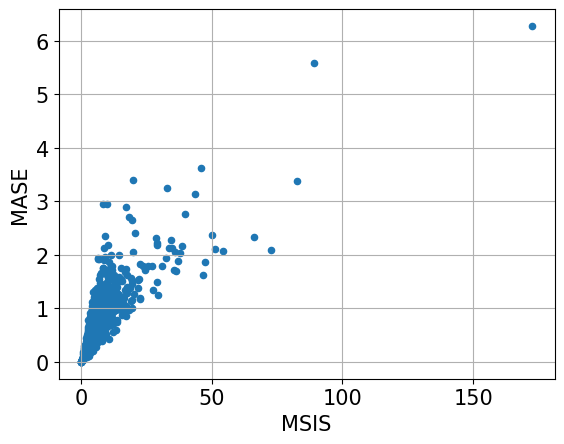

In [47]:
ts_metrics.plot(x='MSIS', y='MASE', kind='scatter')
plt.grid(which="both")
plt.show()

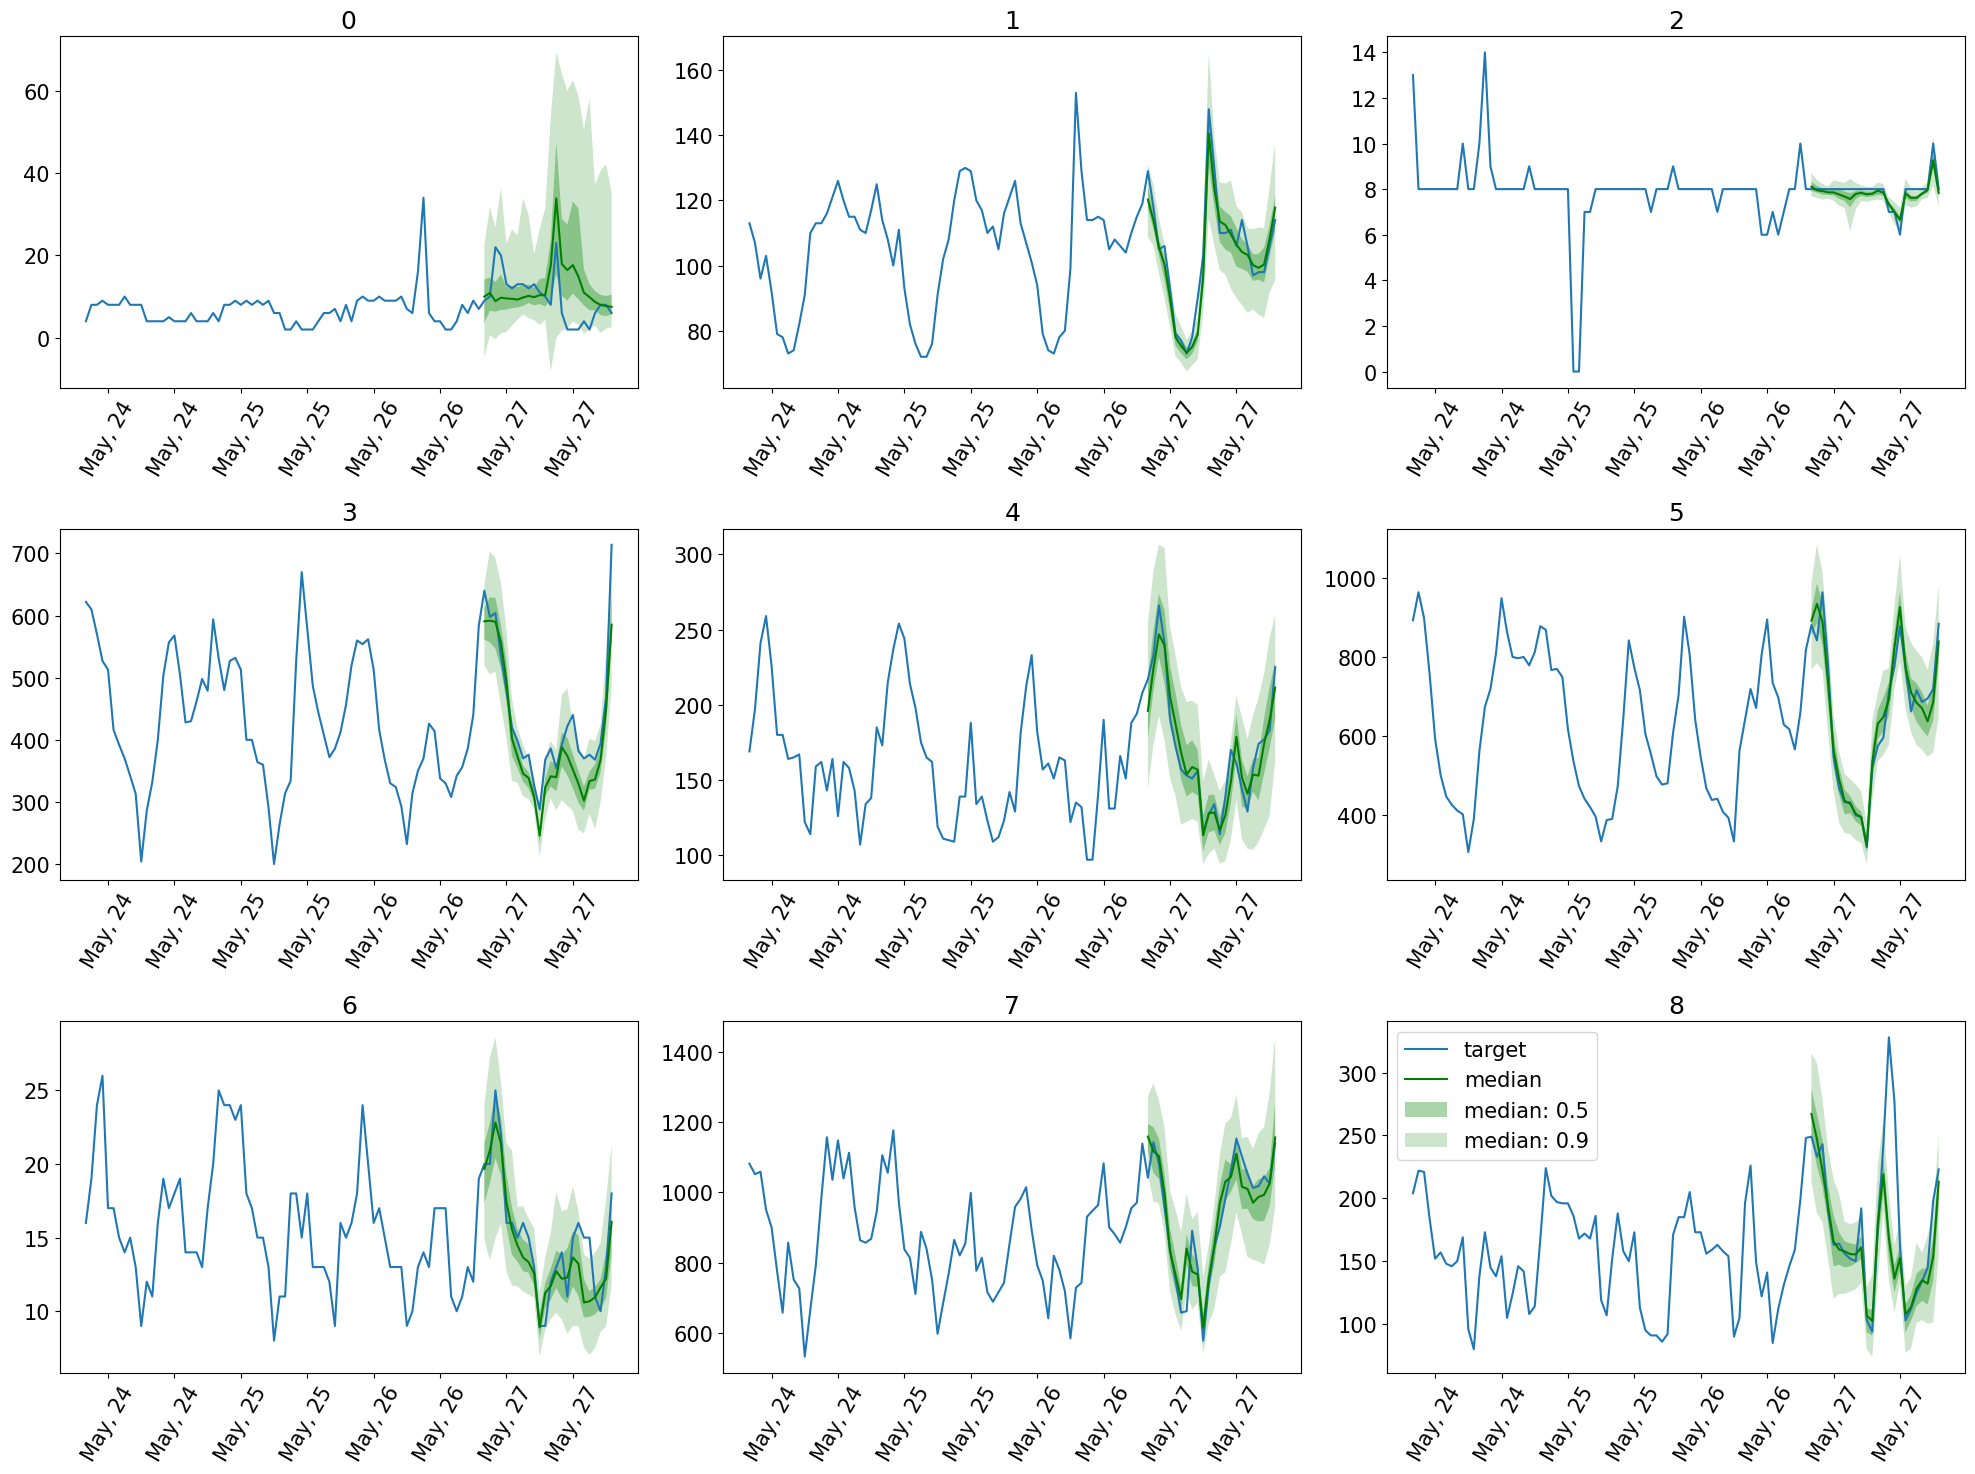

[rank: 0] Received SIGTERM: 15


In [50]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter("%b, %d")
plt.rcParams.update({"font.size": 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx + 1)

    # Convert index for plot
    ts = ts[-4 * dataset.metadata.prediction_length :].to_timestamp()

    plt.plot(
        ts[-4 * dataset.metadata.prediction_length :],
        label="target",
    )
    forecast.plot(color="g", show_label=True, name="median")
    plt.xticks(rotation=60)
    plt.title(forecast.item_id)
    ax.xaxis.set_major_formatter(date_formater)

plt.gcf().tight_layout()
plt.legend()
plt.savefig("elec.pdf")
plt.show()

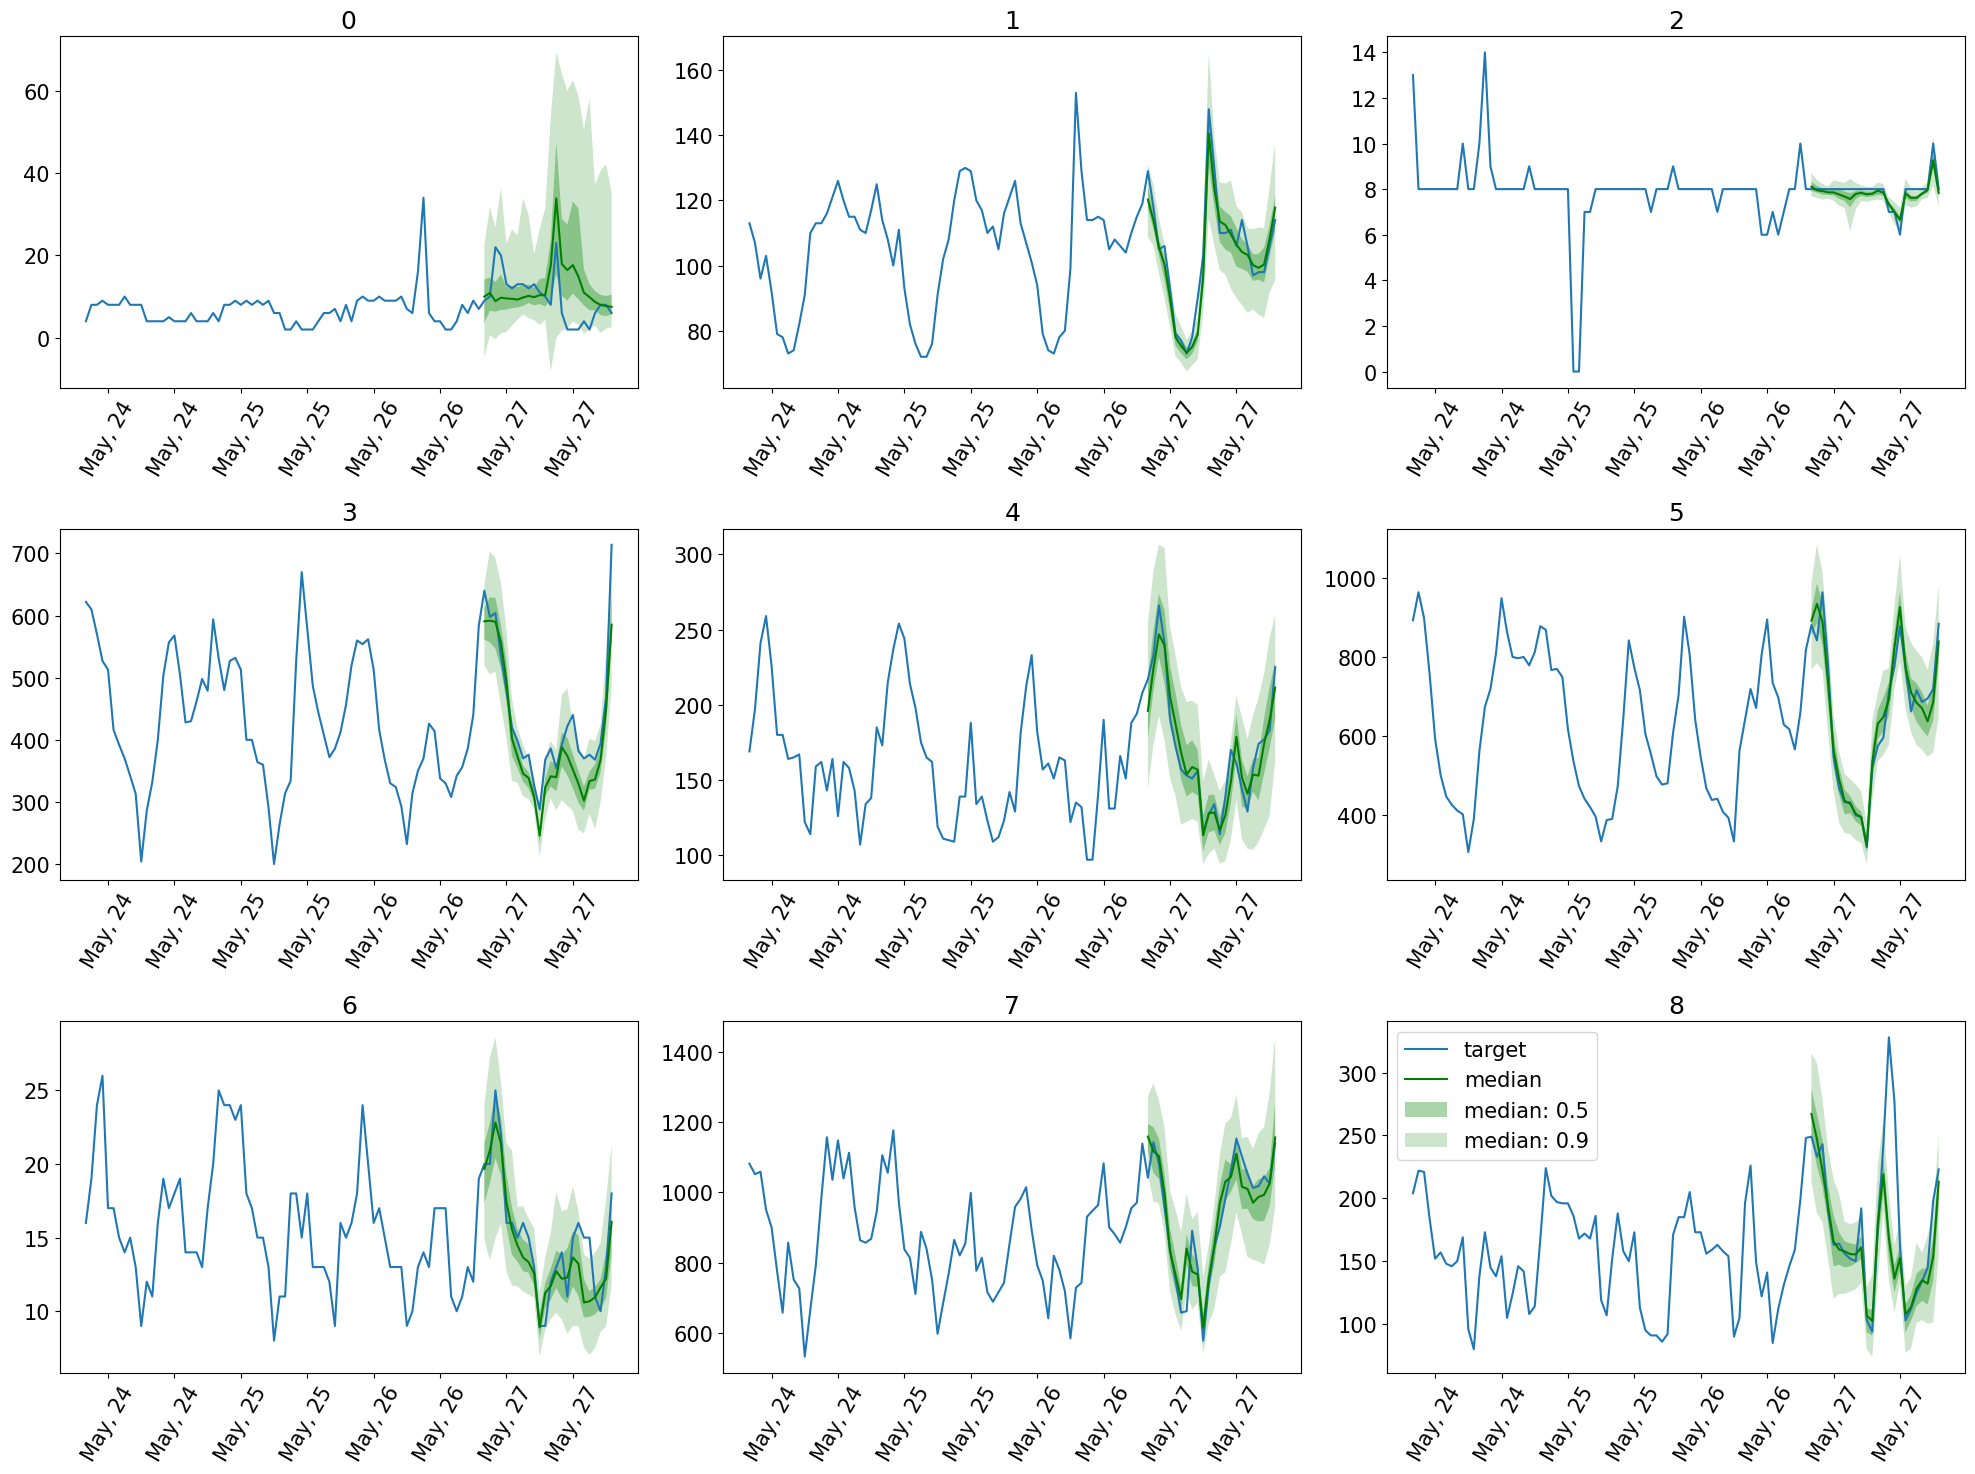

In [49]:
plt.figure(figsize=(20, 15))
date_formater = mdates.DateFormatter("%b, %d")
plt.rcParams.update({"font.size": 15})

for idx, (forecast, ts) in islice(enumerate(zip(forecasts, tss)), 9):
    ax = plt.subplot(3, 3, idx + 1)

    # Convert index for plot
    ts = ts[-4 * dataset.metadata.prediction_length :].to_timestamp()

    plt.plot(
        ts[-4 * dataset.metadata.prediction_length :],
        label="target",
    )
    forecast.plot(color="g", show_label=True, name="median")
    plt.xticks(rotation=60)
    plt.title(forecast.item_id)
    ax.xaxis.set_major_formatter(date_formater)

plt.gcf().tight_layout()
plt.legend()
plt.show()